In [133]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [134]:
os.makedirs('Images_Folder', exist_ok=True)
os.makedirs('Result_Folder', exist_ok=True)

Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 21017 Bytes 



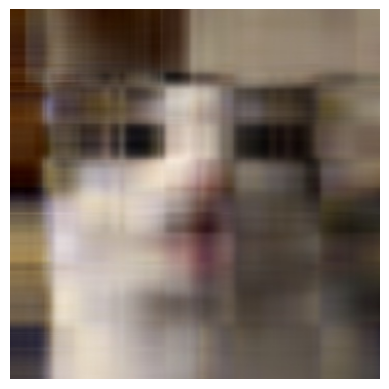

Compression Ratio: 35.9500693481276
MSE: 624.5882947530864 

-------------------------------------------------------
Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 23945 Bytes 



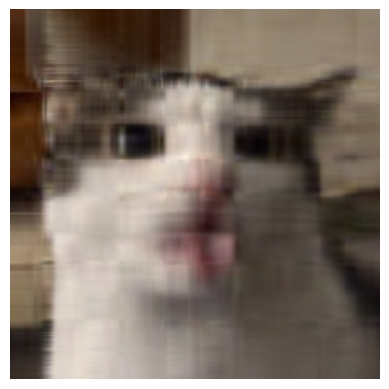

Compression Ratio: 17.9750346740638
MSE: 248.78741512345678 

-------------------------------------------------------
Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 25643 Bytes 



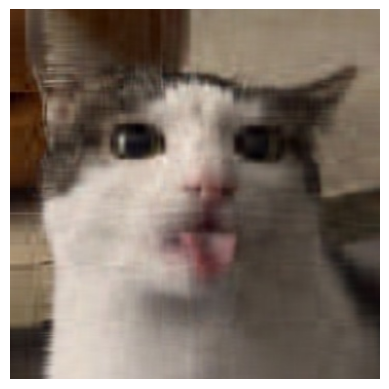

Compression Ratio: 11.983356449375867
MSE: 136.67494598765433 

-------------------------------------------------------
Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 27137 Bytes 



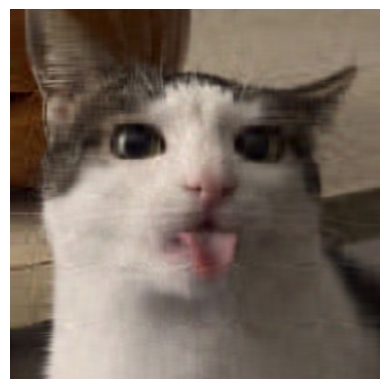

Compression Ratio: 8.9875173370319
MSE: 89.06264660493827 

-------------------------------------------------------
Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 27968 Bytes 



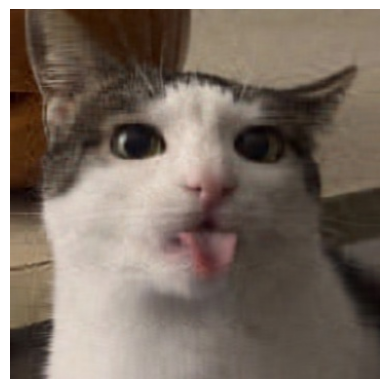

Compression Ratio: 7.1900138696255205
MSE: 63.76822530864197 

-------------------------------------------------------
Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 28367 Bytes 



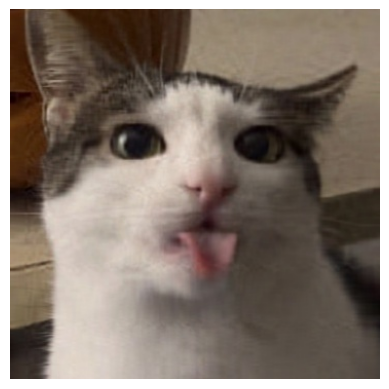

Compression Ratio: 5.991678224687933
MSE: 46.64282407407408 

-------------------------------------------------------
Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 29087 Bytes 



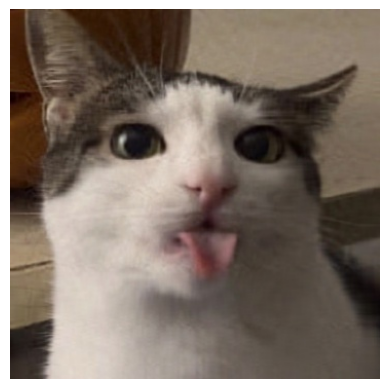

Compression Ratio: 5.135724192589657
MSE: 35.872445987654324 

-------------------------------------------------------
Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 29678 Bytes 



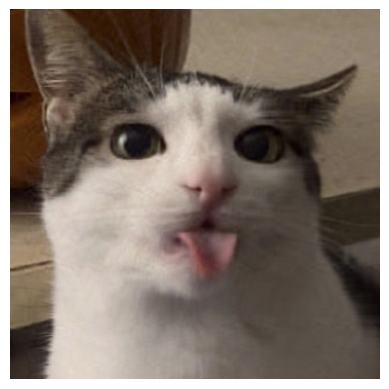

Compression Ratio: 4.49375866851595
MSE: 28.152407407407406 

-------------------------------------------------------
Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 29913 Bytes 



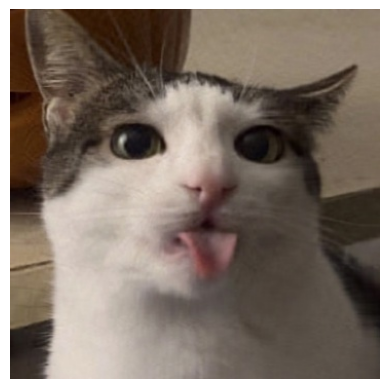

Compression Ratio: 3.9944521497919556
MSE: 22.42369598765432 

-------------------------------------------------------
Found the picture: Cute Cat.png with size: 161835 Bytes
Image size after compression: 30285 Bytes 



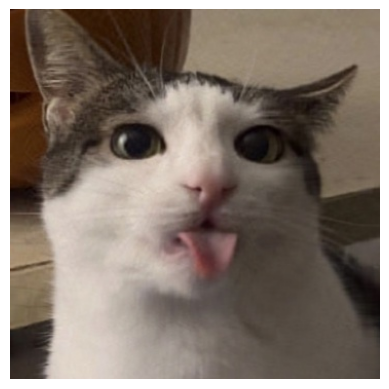

Compression Ratio: 3.5950069348127602
MSE: 18.121983024691357 

-------------------------------------------------------


In [135]:
class SVD_Image_Compression_Processing:
    def __init__(self, Image_Name, Matrix_Approximation):
        self.Image_Name = Image_Name
        self.K = Matrix_Approximation        
        self.Original_Matrix = self.Convert_Image_To_Matrix()
        if self.Original_Matrix is not None:
            self.Shape = self.Original_Matrix.shape
            self.Result = self.Image_Compression()
            self.Show_Image()
            self.Performance_Metrics()
        else:
            print(f"Picture not found!!!!")
    
    def Convert_Image_To_Matrix(self):
        for Image_File in os.listdir("Images_Folder"):
            if not Image_File.endswith(".png"):
                New_Image_File = os.path.splitext(Image_File)[0] + ".png"
                os.rename(
                    os.path.join("Images_Folder", Image_File),
                    os.path.join("Images_Folder", New_Image_File),
                )
                 
        if self.Image_Name in os.listdir('Images_Folder'):
            Image_Path = os.path.join('Images_Folder', self.Image_Name)
            print(f"Found the picture: {self.Image_Name} with size: {os.path.getsize(Image_Path)} Bytes")
            return cv2.imread(Image_Path).astype(np.float64)
        else:
            return None
    
    def Monochromatic_Matrix_Normalization(self):
        Blue_Channel = self.Original_Matrix[:, :, 0] / 255.0
        Green_Channel = self.Original_Matrix[:, :, 1] / 255.0
        Red_Channel = self.Original_Matrix[:, :, 2] / 255.0
        return Blue_Channel, Green_Channel, Red_Channel
    
    def Find_Eigenvalues_and_Eigenvectors(self, Matrix):
        Eigenvalues, Eigenvectors = np.linalg.eig(Matrix)
        return Eigenvalues, Eigenvectors

    def Sigma_Matrix(self, Matrix):
        Singular_Values = np.sqrt(np.abs(self.Find_Eigenvalues_and_Eigenvectors(Matrix)[0]))
        Sigma_Matrix = np.zeros(Matrix.shape, dtype='float_')
        for i in range(min(len(Singular_Values), Matrix.shape[0], Matrix.shape[1])):
            Sigma_Matrix[i, i] = Singular_Values[i]
        return Sigma_Matrix
    
    def Singular_Value_Decomposition(self, Matrix):
        A = Matrix
        AtA = np.matmul(A.T, A)
        U = np.zeros((A.shape[0], self.K), dtype='float_')
        D = self.Sigma_Matrix(AtA)
        V = self.Find_Eigenvalues_and_Eigenvectors(AtA)[1]
        
        for Column in range(self.K):
            U[:, Column] = np.matmul(A, V[:, Column]) / D[Column, Column]
        Result = np.matmul(U[:, :self.K], D[:self.K, :self.K]) @ V[:, :self.K].T
        return Result

    def Image_Compression(self):
        Blue_Channel, Green_Channel, Red_Channel = self.Monochromatic_Matrix_Normalization()
        
        Blue_Channel_SVD = self.Singular_Value_Decomposition(Blue_Channel)
        Green_Channel_SVD = self.Singular_Value_Decomposition(Green_Channel)        
        Red_Channel_SVD = self.Singular_Value_Decomposition(Red_Channel)

        Compressed_Image_Result = np.zeros((self.Shape[0], self.Shape[1], 3), dtype=np.float64)
        Compressed_Image_Result[:, :, 0] = Blue_Channel_SVD
        Compressed_Image_Result[:, :, 1] = Green_Channel_SVD
        Compressed_Image_Result[:, :, 2] = Red_Channel_SVD

        Compressed_Image_Result = np.clip(Compressed_Image_Result * 255, 0, 255).astype(np.uint8)
        return Compressed_Image_Result
    
    def Show_Image(self):
        Filename = f"{self.K}_{self.Image_Name}_BRG.jpg"
        Result_Path = os.path.join('Result_Folder', Filename) 
        cv2.imwrite(Result_Path, self.Result)    
        Img = cv2.imread(Result_Path)
        Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
        print(f'Image size after compression: {os.path.getsize(Result_Path)} Bytes \n')
        
        plt.imshow(Img)
        plt.axis('off')
        plt.show()
        
    def Performance_Metrics(self):
        Compression_Ratio = (self.Shape[0]*self.Shape[1]) / (self.K*(self.Shape[0] + self.Shape[1] + 1))
        print(f'Compression Ratio: {Compression_Ratio}')
        MSE = np.sum(np.square(self.Original_Matrix - self.Result))/(self.Shape[0]*self.Shape[1])
        print(f'MSE: {MSE} \n')
        print('-------------------------------------------------------')
                
if __name__ == '__main__':
    for Num in range(4, 51):
        if Num % 5 == 0:
            SVD_Image_Compression_Processing('Cute Cat.png', Num)